In [1]:
from neuron import h
from neuron.units import ms, mV, µm

In [2]:
h.load_file("stdrun.hoc")
%matplotlib notebook

In [3]:
class BallAndStick:
    def __init__(self, gid):
        self._gid = gid
        self.soma = h.Section(name = "soma", cell=self)
        self.dend = h.Section(name = "dend", cell=self)
        self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157 * µm
        self.dend.L = 200 * µm
        self.dend.diam = 1 * µm

    def __repr__(self):
        return "BallAndStick[{}]".format(self._gid)

In [4]:
my_cell = BallAndStick(0)
my_cell.soma(0.5).area()

500.00296377255506

In [5]:
import matplotlib.pyplot as plt

h.PlotShape(False).plot(plt)

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


<IPython.core.display.Javascript object>

<Axis3DWithNEURON: >

In [6]:
from neuron import gui

ps =  h.PlotShape(True)
ps.show(0)

1.0

In [7]:
ps.show(0)

1.0

In [8]:
class BallAndStick:
    def __init__(self, gid):
        self._gid = gid
        self._setup_morphology()
        self._setup_biophysics()

    def _setup_morphology(self):
        self.soma = h.Section(name="soma", cell=self)
        self.dend = h.Section(name="dend", cell=self)
        self.dend.connect(self.soma)
        self.all = self.soma.wholetree()
        self.soma.L = self.soma.diam = 12.6157 * µm
        self.dend.L = 200 * µm
        self.dend.diam = 1 * µm

    def _setup_biophysics(self):
        for sec in self.all:
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
        self.soma.insert("hh")  # <-- NEW
        for seg in self.soma:  # <-- NEW
            seg.hh.gnabar = (
                0.12  # Sodium conductance in S/cm2                  # <-- NEW
            )
            seg.hh.gkbar = (
                0.036  # Potassium conductance in S/cm2               # <-- NEW
            )
            seg.hh.gl = 0.0003  # Leak conductance in S/cm2                    # <-- NEW
            seg.hh.el = (
                -54.3 * mV
            )  # Reversal potential                           # <-- NEW
        # Insert passive current in the dendrite                       # <-- NEW
        self.dend.insert("pas")  # <-- NEW
        for seg in self.dend:  # <-- NEW
            seg.pas.g = 0.001  # Passive conductance in S/cm2        # <-- NEW
            seg.pas.e = -65 * mV  # Leak reversal potential             # <-- NEW


    def __repr__(self):
        return "BallAndStick[{}]".format(self._gid)


my_cell = BallAndStick(0)

In [9]:
for sec in h.allsec():
    print("%s: %s" % (sec, ", ".join(sec.psection()["density_mechs"].keys())))

BallAndStick[0].soma: hh
BallAndStick[0].dend: pas


In [10]:
stim = h.IClamp(my_cell.dend(1))
stim.get_segment()

BallAndStick[0].dend(1)

In [11]:
stim.delay = 5
stim.dur = 1
stim.amp = 0.1

In [12]:
soma_v = h.Vector().record(my_cell.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

In [13]:
h.finitialize(-65 * mV)
h.continuerun(25*ms)

0.0

In [17]:
soma_v

Vector[3]

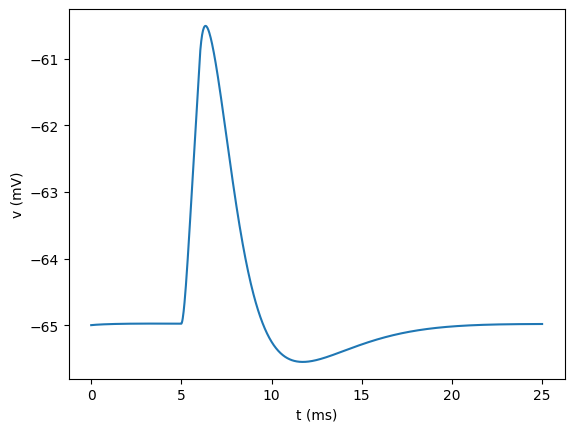

In [18]:
%matplotlib inline

plt.figure()
plt.plot(t, soma_v)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()

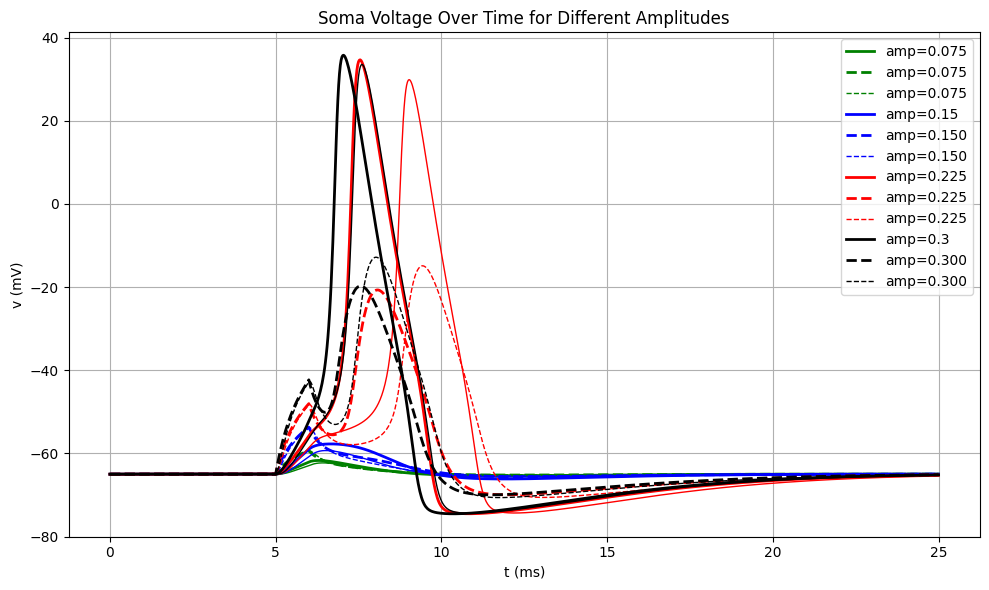

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

dend_v = h.Vector().record(my_cell.dend(0.5)._ref_v)

amps = [0.075 * i for i in range(1, 5)]
colors = ["green", "blue", "red", "black"]

for amp, color in zip(amps, colors):
    stim.amp = amp
    for my_cell.dend.nseg, width in [(1, 2), (101, 1)]:
        h.finitialize(-65)
        h.continuerun(25)
        ax.plot(t, list(soma_v), linewidth=width, label="amp={:.3g}".format(amp) if my_cell.dend.nseg == 1 else "", color=color)
        ax.plot(t, list(dend_v), linewidth=width, label=f"amp={amp:.3f}", color=color, linestyle = "dashed")

ax.set_xlabel('t (ms)')
ax.set_ylabel('v (mV)')
ax.set_title('Soma Voltage Over Time for Different Amplitudes')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()